In [ ]:
from scipy import stats

In [ ]:
stats.norm.cdf(70,60,10)

np.float64(0.8413447460685429)

In [ ]:
1 - stats.norm.cdf(80,60,10)

np.float64(0.02275013194817921)

In [ ]:
1 - stats.norm.cdf(70,60,10)

np.float64(0.15865525393145707)

In [ ]:
stats.norm.cdf(680,711,29)

np.float64(0.14254260383881612)

In [ ]:
1 - stats.norm.cdf(750,711,29)

np.float64(0.08934045974656879)

In [ ]:
1 - (0.14254260383881612 + 0.08934045974656879)

0.7681169364146151

In [ ]:
stats.norm.cdf(750,711,29)#https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf

np.float64(0.9106595402534312)

In [ ]:
0.9106595402534312 - 0.14254260383881612

0.7681169364146151

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [ ]:
beml_df=pd.read_csv('/content/BEML.csv')
beml_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [ ]:
glaxo_df=pd.read_csv('/content/GLAXO.csv')
glaxo_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


In [ ]:
beml_df=beml_df[['Date','Close']]
glaxo_df=glaxo_df[['Date','Close']]


In [ ]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [ ]:
glaxo_df


,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [ ]:
glaxo_df.dtypes

,0
Date,object
Close,float64


In [ ]:
beml_df.dtypes

,0
Date,object
Close,float64


In [ ]:
# '''The DataFrames have a date column, so we can
# create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
# ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [ ]:
glaxo_df.head() # now date col is acting as an index

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


In [ ]:
beml_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


Text(0, 0.5, 'Close Price')

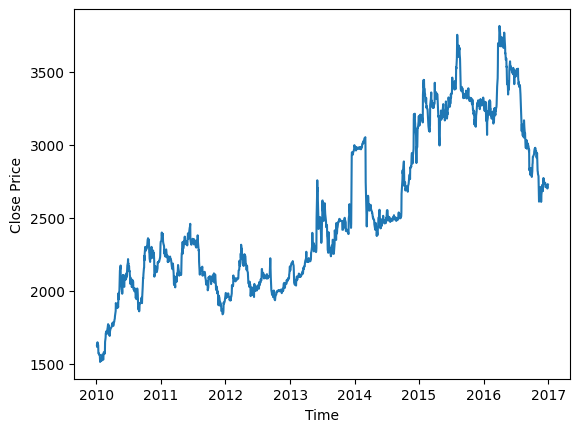

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

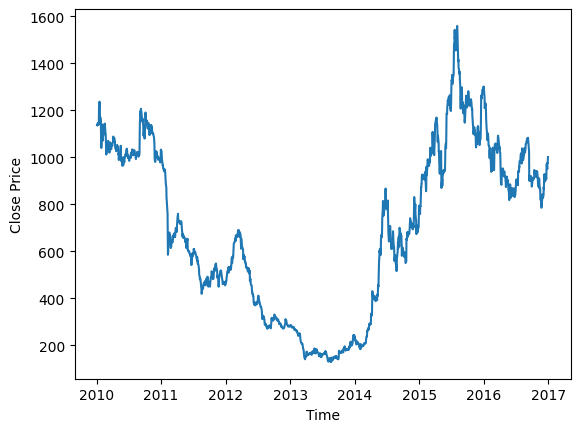

In [ ]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

In [ ]:
# Gain is for each day. We are assuming that gain is coming from normal distribution.
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods=1)
beml_df['gain'] = beml_df.Close.pct_change(periods=1)

In [ ]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [ ]:
beml_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [ ]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()


In [ ]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [ ]:
beml_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


Text(0, 0.5, 'gain')

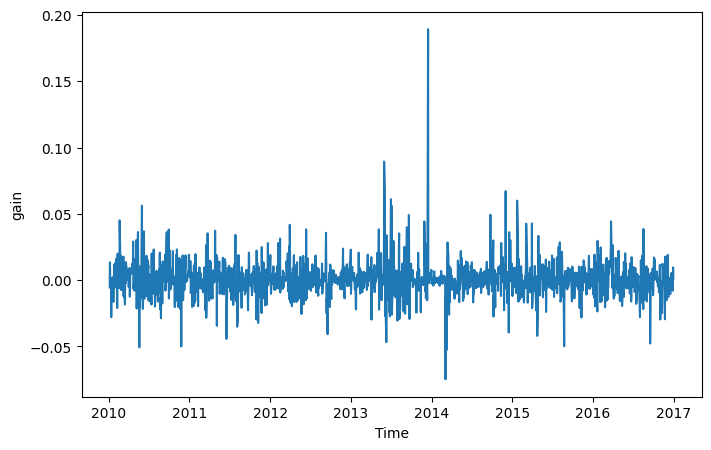

In [ ]:
# GLAXO: Plot the gains. Over the years gain is not changing much.
# In 2014 gain was highest i.e.20% and highest loss upto 7%. Sometimes positive sometimes negative

plt.figure(figsize=(8,5))
plt.plot(glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

Text(0, 0.5, 'gain')

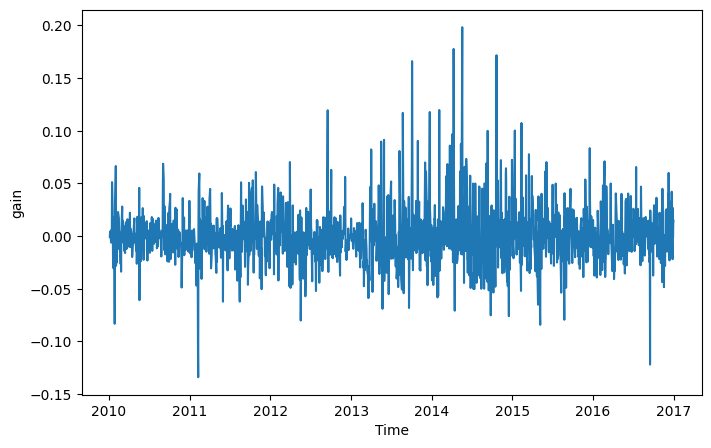

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(beml_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

In [ ]:
'''
plt.figure(figsize=(10,5))
plt.suptitle('Distribution',fontsize=15)
plt.subplot(1,2,1)
sns.distplot(glaxo_df.gain, label = 'Glaxo')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(beml_df.gain, label = 'BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
'''
#bell shaped normal distribution

"\nplt.figure(figsize=(10,5))\nplt.suptitle('Distribution',fontsize=15)\nplt.subplot(1,2,1)\nsns.distplot(glaxo_df.gain, label = 'Glaxo')\nplt.xlabel('gain')\nplt.ylabel('Density')\nplt.legend()\nplt.subplot(1,2,2)\nsns.distplot(beml_df.gain, label = 'BEML')\nplt.xlabel('gain')\nplt.ylabel('Density')\nplt.legend()\n"

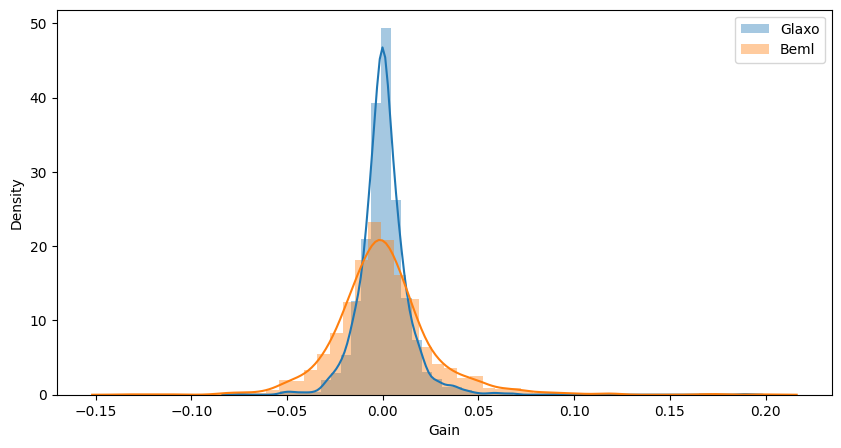

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(glaxo_df.gain,label='Glaxo')
sns.distplot(beml_df.gain,label='Beml')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend()
# for BEML there is more variance (high risk or volatality) than GLAXO

In [ ]:
# Glaxo Mean and Standard Deviation
print('Glaxo mean:',round(glaxo_df.gain.mean(),4))
print('Glaxo standard Devation:',round(glaxo_df.gain.std(),4))

Glaxo mean: 0.0004
Glaxo standard Devation: 0.0134


In [ ]:
glaxo_df.gain.mean()

np.float64(0.0003860410825922916)

In [ ]:
# BEML Mean and Standard Deviation
print('BEML mean:',round(beml_df.gain.mean(),4))
print('BEML standard Devation:',round(beml_df.gain.std(),4))
# BEML has high std

BEML mean: 0.0003
BEML standard Devation: 0.0264


In [ ]:
from scipy import stats
# import scipy
#Probability of making 2% loss or higher loss in Glaxo - left of 0 i.e.e -0.02

stats.norm.cdf(-0.02,0.0004, 0.0134)  # norm.cdf(0.02,mean,std)

#loc=glaxo_df.gain.mean(),
#scale=glaxo_df.gain.std()) # there are 6% of chances having 2% or higher loss

np.float64(0.06395593743937553)

In [ ]:
#Probability of making 2% gain or higher gain in Glaxo - to the right of 0.02
1 - stats.norm.cdf(0.02,0.0004, 0.0134)
# 7% chances of having at least 2% or higher gain, Glaxo seems safer than BEML

np.float64(0.07177658173190637)

# **norm.cdf() and norm.ppf() function difference**

In [ ]:
# To understand difference between cdf() and ppf() execute below code.
# (Cumulative Distribution Function): norm.cdf(normal distribution value, loc, scale): calculates probability for a given normal distribution value.
# (Percent Point Function): norm.ppf(probability,loc,scale): calculates normal distribution value for a given probability.

stats.norm.ppf(0.06395593743937553,0.0004, 0.0134) # output of above command,loc,scale

np.float64(-0.02)

### Inclass Exercise

# **Compute 2% loss or gain for BEML**
Chances of profit or loss are high with BEML than GLAXO

In [ ]:
stats.norm.cdf(-0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

np.float64(0.22155987503755287)

In [ ]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

np.float64(0.22769829484075355)

In [ ]:
from scipy import stats
stats.norm.cdf(1.65,0,1)  # Cumulative Distribution Function - Calculates probability for a given normal distribution value

np.float64(0.9505285319663519)

In [ ]:
stats.norm.ppf(0.9505285319663519,0,1)  # Percent Point Funcion - Calculates normal distribution value for which a given probability is the required value.
                         # cdf() and ppf() are inverse of each other.

np.float64(1.6500000000000001)